##### Sample data processing and analysis to obtain orbital plot from vibration data

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython import display
import time
from scipy import signal

In [2]:
# define sampling rate and duration (length) of signal
fs = 100
length = 1
t = np.arange(0, length, (1/fs))

# define phase difference between x and y signal
deg = 90
phase_diff = deg * np.pi / 180

# create sample sinusoidal data

# single frequency signal
# x_disp = 10 * np.sin(2 * np.pi * 10 * t)
# y_disp = 10 * np.sin(2 * np.pi * 10 * (t + phase_diff))

# multi frequency signal
x_disp = 10 * np.sin(2 * np.pi * 10 * t) + 5 * np.sin(2 * np.pi * 20 * t) + 3 * np.sin(2 * np.pi * 30 * t)
y_disp = 10 * np.sin(2 * np.pi * 10 * (t + phase_diff)) + 5 * np.sin(2 * np.pi * 20 * (t + phase_diff)) + 3 * np.sin(2 * np.pi * 30 * (t + phase_diff))

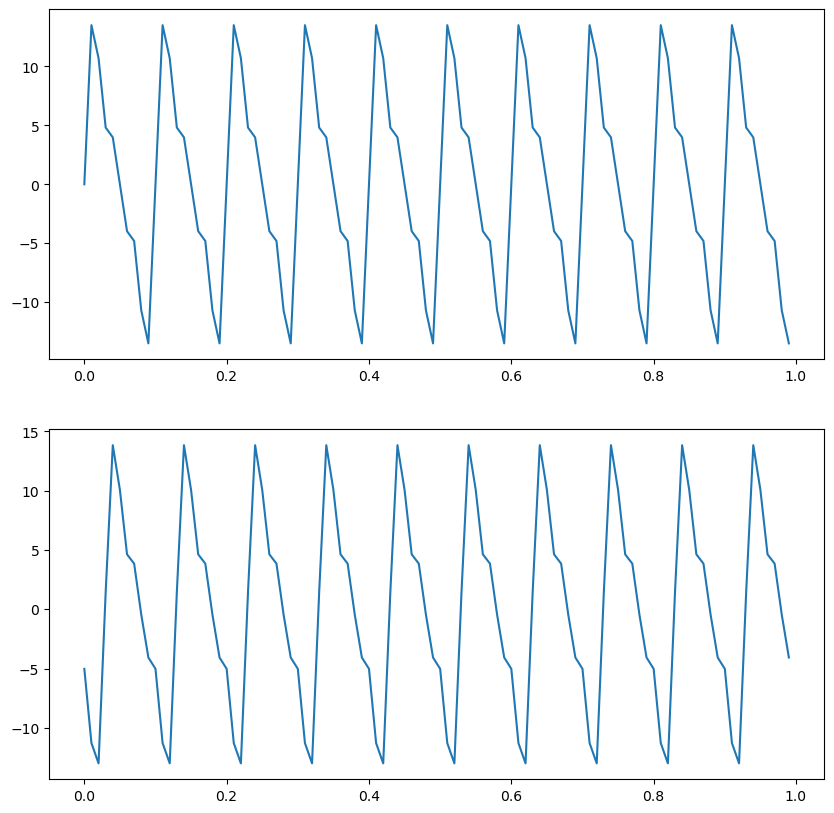

In [3]:
# plot the signal in time domain
fig, ax = plt.subplots(figsize = (10, 10), nrows = 2, ncols = 1)
ax[0].plot(t, x_disp)
ax[1].plot(t, y_disp)

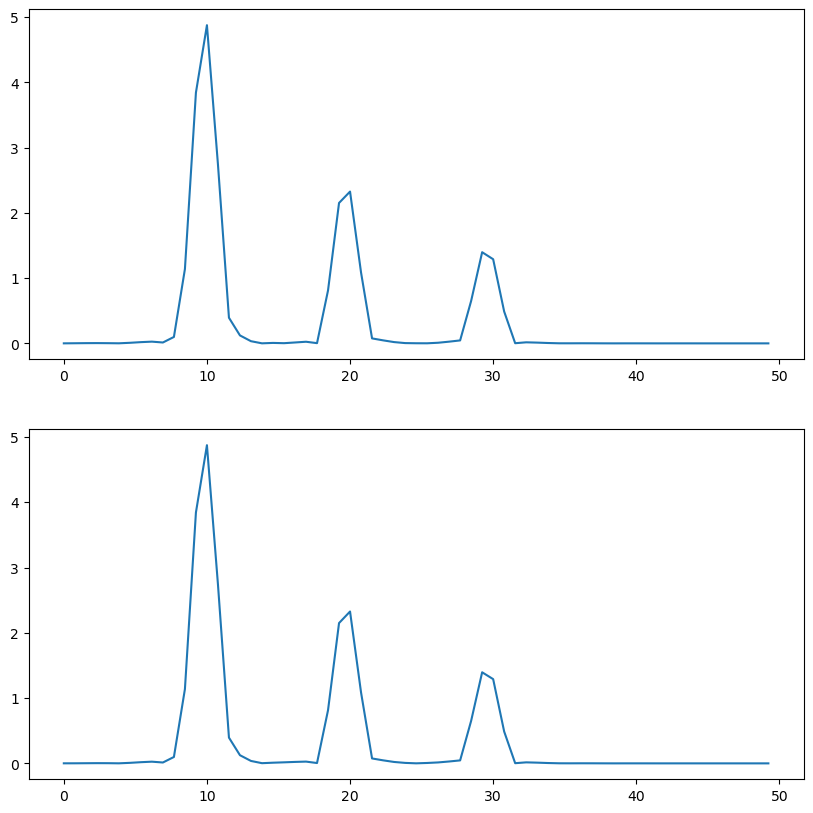

In [4]:
# plot the signal in frequency domain plot
nfft = int(pow(2, np.ceil(np.log2(len(x_disp)))))
f = np.arange(0,1,1/(nfft/2+1)) * (fs/2)
win = np.hanning(len(x_disp))

X_DISP = 2/len(x_disp) * np.fft.fft(win * x_disp, nfft)
X_DISP = np.abs(X_DISP)[0:int(nfft/2+1)]

Y_DISP = 2/len(y_disp) * np.fft.fft(win * y_disp, nfft)
Y_DISP = np.abs(Y_DISP)[0:int(nfft/2+1)]

fig, ax = plt.subplots(figsize = (10, 10), nrows = 2, ncols = 1)
ax[0].plot(f, X_DISP)
ax[1].plot(f, Y_DISP)

In [33]:
# filtering signal to 1X RPM and 2X RPM
b1, a1 = signal.iirpeak(10 / (fs/2), 30)
b2, a2 = signal.iirpeak(20 / (fs/2), 30)

x_disp_1rpm = signal.filtfilt(b1, a1, x_disp, padtype='constant', padlen=len(x_disp)-1)
y_disp_1rpm = signal.filtfilt(b1, a1, y_disp, padtype='constant', padlen=len(y_disp)-1)

x_disp_2rpm = signal.filtfilt(b2, a2, x_disp, padtype='constant', padlen=len(x_disp)-1)
y_disp_2rpm = signal.filtfilt(b2, a2, y_disp, padtype='constant', padlen=len(y_disp)-1)

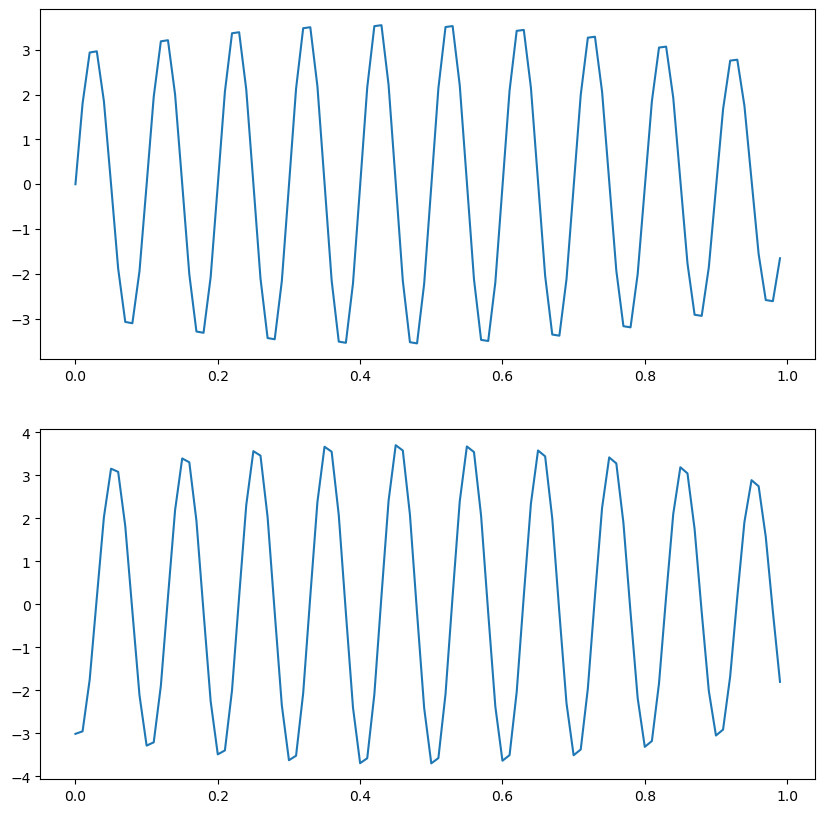

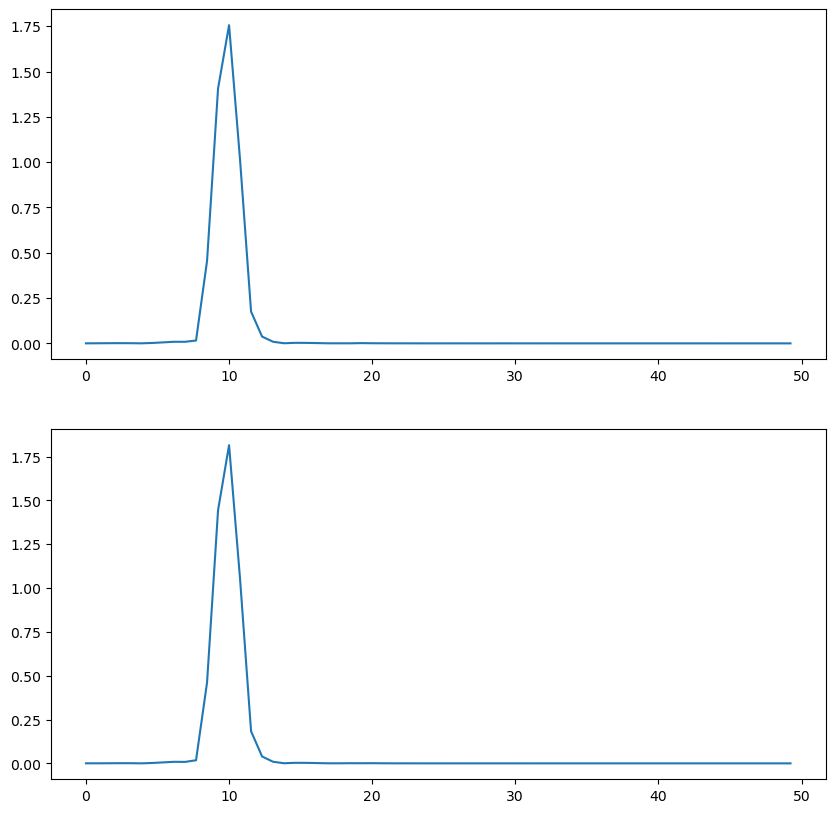

In [34]:
# plot the 1xRPM filtered signal in time domain
fig, ax = plt.subplots(figsize = (10, 10), nrows = 2, ncols = 1)
ax[0].plot(t, x_disp_1rpm)
ax[1].plot(t, y_disp_1rpm)
win = np.hanning(len(x_disp))

# plot the signal in frequency domain plot
nfft = int(pow(2, np.ceil(np.log2(len(x_disp_1rpm)))))
f = np.arange(0,1,1/(nfft/2+1)) * (fs/2)

X_DISP = 2/len(x_disp) * np.fft.fft(win * x_disp_1rpm, nfft)
X_DISP = np.abs(X_DISP)[0:int(nfft/2+1)]

Y_DISP = 2/len(y_disp) * np.fft.fft(win * y_disp_1rpm, nfft)
Y_DISP = np.abs(Y_DISP)[0:int(nfft/2+1)]

fig, ax = plt.subplots(figsize = (10, 10), nrows = 2, ncols = 1)
ax[0].plot(f, X_DISP)
ax[1].plot(f, Y_DISP)

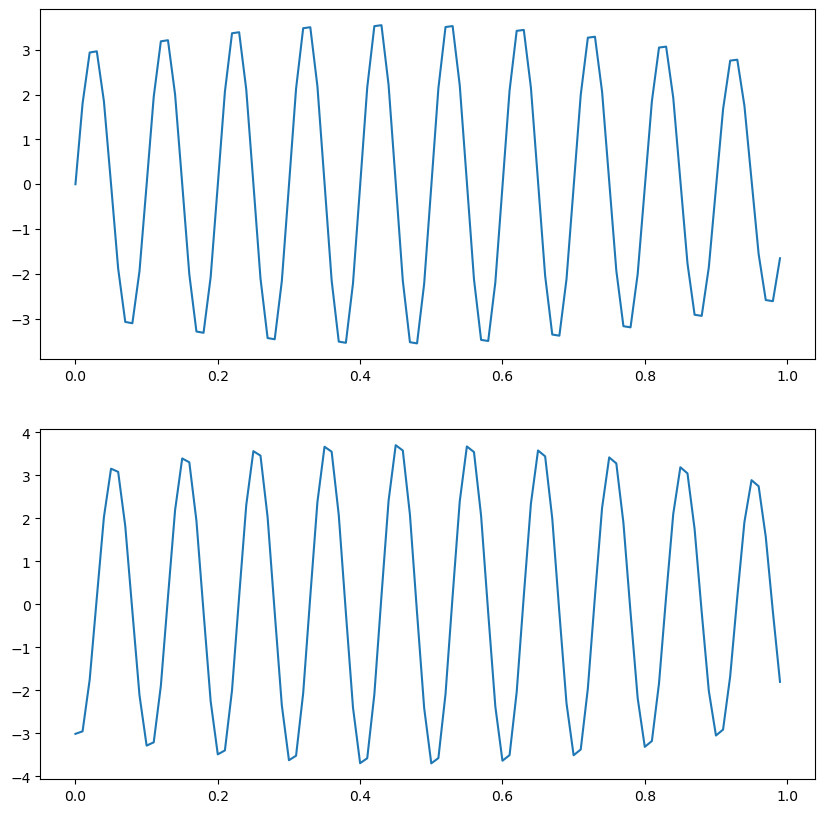

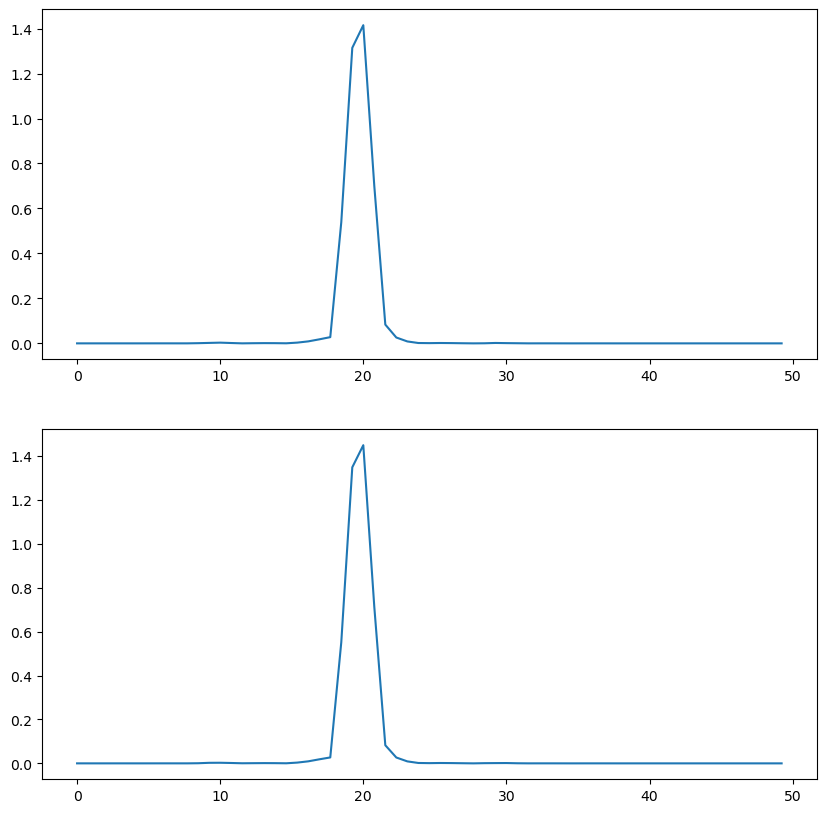

In [35]:
# plot the 2xRPM filtered signal in time domain
fig, ax = plt.subplots(figsize = (10, 10), nrows = 2, ncols = 1)
ax[0].plot(t, x_disp_1rpm)
ax[1].plot(t, y_disp_1rpm)
win = np.hanning(len(x_disp))

# plot the signal in frequency domain plot
nfft = int(pow(2, np.ceil(np.log2(len(x_disp_2rpm)))))
f = np.arange(0,1,1/(nfft/2+1)) * (fs/2)

X_DISP = 2/len(x_disp) * np.fft.fft(win * x_disp_2rpm, nfft)
X_DISP = np.abs(X_DISP)[0:int(nfft/2+1)]

Y_DISP = 2/len(y_disp) * np.fft.fft(win * y_disp_2rpm, nfft)
Y_DISP = np.abs(Y_DISP)[0:int(nfft/2+1)]

fig, ax = plt.subplots(figsize = (10, 10), nrows = 2, ncols = 1)
ax[0].plot(f, X_DISP)
ax[1].plot(f, Y_DISP)

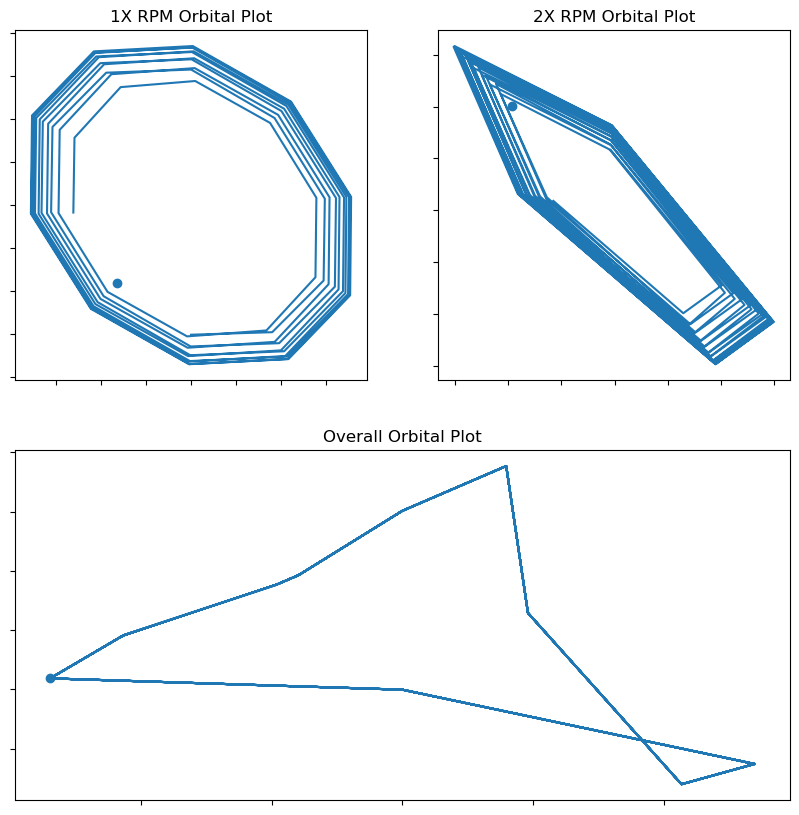

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [36]:
# create orbital plot
x0 = []
y0 = []
x01rpm = []
y01rpm = []
x02rpm = []
y02rpm = []

count = 0

for i in range(len(t)):

    count += 1

    x = x_disp[i]
    y = y_disp[i]
    x1 = x_disp_1rpm[i]
    y1 = y_disp_1rpm[i]
    x2 = x_disp_2rpm[i]
    y2 = y_disp_2rpm[i]

    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(212)
    ax.scatter(x, y)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("Overall Orbital Plot")

    ax1 = fig.add_subplot(221)
    ax1.scatter(x1, y1)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_title("1X RPM Orbital Plot")

    ax2 = fig.add_subplot(222)
    ax2.scatter(x2, y2)
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    ax2.set_title("2X RPM Orbital Plot")

    if i > 0:
        ax.plot(x0, y0)
        ax1.plot(x01rpm, y01rpm)
        ax2.plot(x02rpm, y02rpm)

    x0.append(x)
    y0.append(y)
    x01rpm.append(x1)
    y01rpm.append(y1)
    x02rpm.append(x2)
    y02rpm.append(y2)

    plt.show

    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.01)
    plt.clf()